# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## 1. Открытие и изучение файла

In [1]:
import pandas as pd

In [3]:
# Открываем датасет и выведим 5 чтрок

path = r"C:\Users\Asus\Documents\Python Scripts\github praktikum\05 Введение в машинное обучение"
df = pd.read_csv(path+'\ML_1.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# Выведим на экран информацтб о датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Счет пропушенных значений

count_nan = df.isna().sum()

count_nan

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

### Вывод

Из информаци иследует что нет пропущеных значении, и тип данных каждой строке годен для дальнейшего построения моделей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEE0A72988>,
      dtype=object)

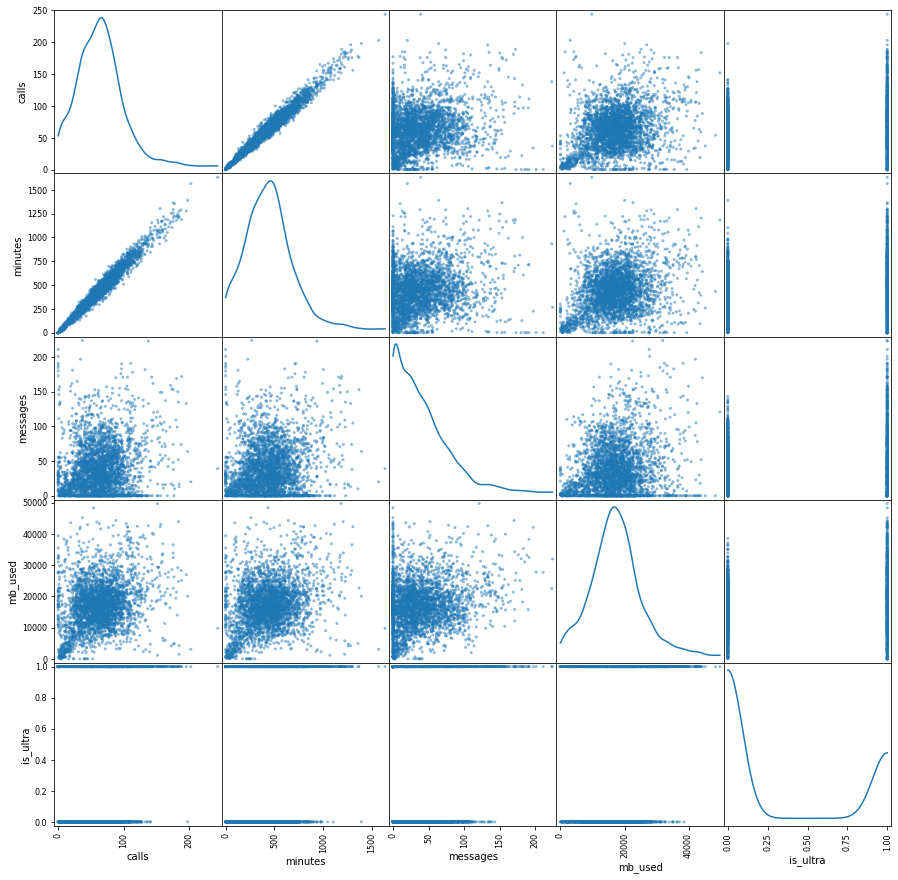

In [8]:
# Строим матрица рассеяния

pd.plotting.scatter_matrix(df, figsize = (15,15), diagonal = 'kde')


## 2. Разбиение данные на выборки

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
# Определяем функцию для того чтобы разделить датасет на : обущающий, валидацилный и тестовый

def train_test_validate_split(features, targets, test_size=0.2, validate_size=0.1):
    # Делим на обучующую и тестовую часть
    features_train, features_test, targets_train, targets_test = train_test_split(
        features,
        targets,
        stratify=targets,
        test_size=test_size
    )
    # Воторой раз делим датачет
    post_split_validate_size = validate_size / (1 - test_size)
    features_train, features_validate, targets_train, targets_validate = train_test_split(
        features_train,
        targets_train,
        stratify=targets_train,
        test_size=post_split_validate_size
    )
    return features_train, features_test, features_validate, targets_train, targets_test, targets_validate

In [11]:
# Определение признаков и целового признака 

features = df.drop('is_ultra' , axis = 1)

target = df['is_ultra']

In [12]:
# Применение функцию деления датасета на 3 части 
features_train, features_test, features_validate, targets_train, targets_test, targets_validate =(
    train_test_validate_split(features, target) 
)


In [13]:
#Именование стольбцов для далнейщего обработка в цикле

features_train.name = 'features_train'
features_test.name = 'features_test'
features_validate.name = 'features_validate'
targets_train.name = 'targets_train'
targets_test.name = 'targets_test'
targets_validate.name = 'targets_validate'

In [14]:
# Проверка длины датасетов 

for data in (features_train, features_test, features_validate, targets_train, targets_test, targets_validate ):
    print('Длина датафрэйма', data.name  ,':', len(data))

Длина датафрэйма features_train : 2249
Длина датафрэйма features_test : 643
Длина датафрэйма features_validate : 322
Длина датафрэйма targets_train : 2249
Длина датафрэйма targets_test : 643
Длина датафрэйма targets_validate : 322


## 3. Исследование модели

In [15]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [33]:
# Создание листов для далнейшего сохранения резултатов классификатора дерева решений

array_DTC_train = []
array_DTC_validate =[]

#Цикл для обучения валидация и тест на разных гиперпараметрах классификатор дерева решений
for depth in range(1, 31, 2):
    
    model_DTC = DecisionTreeClassifier(max_depth = depth ,  random_state = 123456)
    model_DTC.fit(features_train , targets_train)
    
    prediction_DTC_train =  model_DTC.predict(features_train)
    accuracy_DTC_train = accuracy_score(targets_train, prediction_DTC_train)
    array_DTC_train.append(accuracy_DTC_train.round(4))
    
    prediction_DTC_validate = model_DTC.predict(features_validate)
    accuracy_DTC_validate = accuracy_score(targets_validate, prediction_DTC_validate)
    array_DTC_validate.append(accuracy_DTC_validate.round(4))
    
    
  
    


In [34]:
import numpy as np

# Резултаты качество обучения, валидация в одном датафрейме классификатора дерева решений

accuracy_DTC = pd.DataFrame( [array_DTC_train,array_DTC_validate],
                           columns = range(1,31,2)).T.reset_index()                        
                           


accuracy_DTC.columns = ['max_depth','train','validate']

accuracy_DTC

,max_depth,train,validate
0,1,0.7501,0.7702
1,3,0.7950,0.7981
2,5,0.8115,0.8043
3,7,0.8426,0.8106
4,9,0.8666,0.7826
5,11,0.8960,0.7888
6,13,0.9284,0.7671
7,15,0.9515,0.7640
8,17,0.9733,0.7484
9,19,0.9871,0.7422


Text(0.5, 1.0, 'Accuracy Decision Tree Classifier Models')

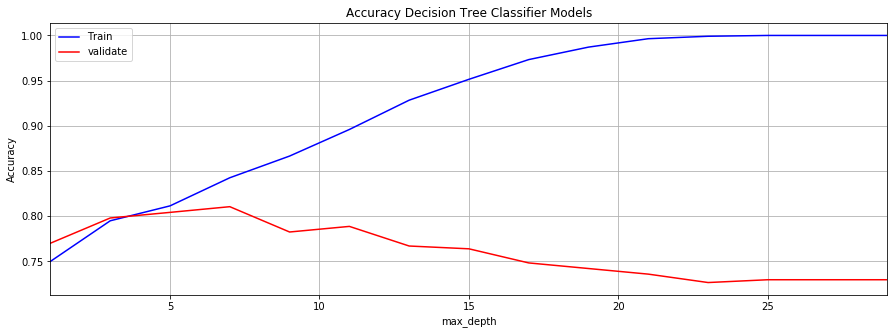

In [35]:
import matplotlib.pyplot as plt 

x = accuracy_DTC['max_depth']
y = accuracy_DTC['train']
z = accuracy_DTC['validate']
plt.figure(figsize=(15,5))
plt.xlim(1,29)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.plot(x, y , color='blue', label = 'Train')
plt.plot(x,z,  color = 'red', label = 'validate')
plt.grid()
plt.legend()
plt.title('Accuracy Decision Tree Classifier Models')



## Вывод 

При увеличении глубины дерева в классификатора дерева решений наблюдается учеличение значения точности на обучающий модель, и при валидации значения качество снижается, следовательно при увеличении значения глубины дерево увеличивается переобучения моделей. Оптимальный значение глубины является 7. При данном значении глубины значение точность при валидации максимальное и равно 80%.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Создание листов для далнейшего сохранения резултатов случайного леса

RFC_train = []
RFC_validate = []


#Цикл для обучения валидация и тест на разных гиперпараметрах случайного леса
for estim in range(1, 21, 1):
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators= estim, max_depth = 10)
    
    model_RFC.fit(features_train , targets_train)
    
    prediction_RFC_train = model_RFC.predict(features_train)
    accuracy_RFC_train =  accuracy_score(targets_train, prediction_RFC_train)
    RFC_train.append(accuracy_RFC_train.round(4))
    
    prediction_RFC_validate = model_RFC.predict(features_validate)
    RFC_validate_accuracy = accuracy_score(targets_validate, prediction_RFC_validate)
    RFC_validate.append(RFC_validate_accuracy.round(4))
    
    
 


In [38]:
# Резултаты качество обучения, валидация и теста в одном датафрейме случайного леса

accuracy_RFC = pd.DataFrame( [RFC_train, RFC_validate],
                           columns = range(1,21,1)).T.reset_index() 

accuracy_RFC.columns = ['estim', 'train', 'validate']

accuracy_RFC

,estim,train,validate
0,1,0.8386,0.7857
1,2,0.8519,0.7857
2,3,0.8635,0.8012
3,4,0.8706,0.8012
4,5,0.8773,0.8043
5,6,0.8817,0.8012
6,7,0.8831,0.8199
7,8,0.8826,0.8137
8,9,0.8835,0.8230
9,10,0.8839,0.8230


Text(0.5, 1.0, ' Accuracy Random Forest Classifier Models ')

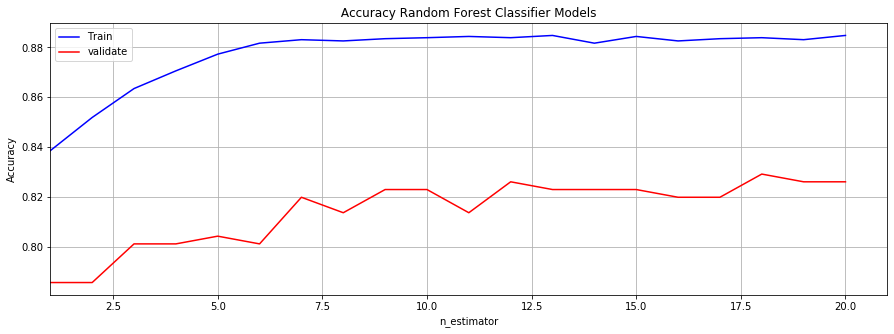

In [39]:
x = accuracy_RFC['estim']
y = accuracy_RFC['train']
z = accuracy_RFC['validate']
plt.figure(figsize=(15,5))
plt.xlim(1,21)
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.plot(x, y , color='blue', label = 'Train')
plt.plot(x,z,  color = 'red', label = 'validate')
plt.grid()
plt.legend()
plt.title(' Accuracy Random Forest Classifier Models ')


## Вывод 

При увеличении значение n_estimators случайного леса  решений значения точности валидационой выборке увличивается и достигает его максимальное значение при n_estimators равно 10, затем точности валидации снижается. Это свидителствует о переобучения модели.

In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
# Обучение модель Логистической регресси

model = LogisticRegression(random_state=12345, solver = 'liblinear' , max_iter = 10)

model.fit(features_train, targets_train)

prediction_train = model.predict(features_train)

accuracy_train = accuracy_score(targets_train, prediction_train)

accuracy_train.round(5)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.71232

In [42]:
# Валидация модель Логистической регресси


prediction_validate = model.predict(features_validate)

accuracy_validate = accuracy_score(targets_validate, prediction_validate)

accuracy_validate.round(5)

0.70497

## Вывод 

При увеличении применения логистической регресии значение точности меньше чем при присенение других моделей обучения.

## 4. Проверка модели на тестовой выборке

In [43]:
# Тестирование модель Логистической регресси

prediction_test = model.predict(features_test)

accuracy_test = accuracy_score(targets_test, prediction_test)

accuracy_test

0.7045101088646968

In [44]:
# Нахождение оптимальной модели класификатора дерево рещений по максимальному значению точности валидаций
optimal_DTC_accuracy = accuracy_DTC[accuracy_DTC['validate'] == accuracy_DTC['validate'].max()]

optimal_DTC_accuracy

,max_depth,train,validate
3,7,0.8426,0.8106


In [45]:
#обучение модели классификатора дерева решений с оптимальным значением глубины дерево
optimal_model_DTC = DecisionTreeClassifier(max_depth = 7 ,  random_state = 123456)
optimal_model_DTC.fit(features_train , targets_train)

# Тестирование модель классификатора дерева решений
prediction_DTC_test =  optimal_model_DTC.predict(features_test)
accuracy_DTC_test = accuracy_score(targets_test, prediction_DTC_test)
accuracy_DTC_test.round(4)

0.8165

In [46]:
# Нахождение оптимальной модели клаяификатора дерево рещений
optimal_RFC_accuracy = accuracy_RFC[accuracy_RFC['validate'] == accuracy_RFC['validate'].max()]

optimal_RFC_accuracy

,estim,train,validate
17,18,0.8839,0.8292


In [47]:
#обучение модели случайного леса
optimal_model_RFC = RandomForestClassifier(random_state=12345, n_estimators= 8, max_depth = 7)
    
optimal_model_RFC.fit(features_train , targets_train)

# Тестирование модель случайного леса

prediction_RFC_test = optimal_model_RFC.predict(features_test)
accuracy_RFC_test =  accuracy_score(targets_test, prediction_RFC_test)
accuracy_RFC_test.round(4)



0.8149

## Вывод

Исходя из полученых значении качество лучше модель оказался случаный лес при n_estimator равно 8 , получили качество при тестирование равно 82,43%

## 5. Проверка модели на адекватность

In [48]:
#Проверка на адекватность

sanity_check = pd.DataFrame([[accuracy_DTC_test], [accuracy_RFC_test], [accuracy_test]],
                           columns = ['Accuracy_Test'],
                           index = ['Decision_Tree_Classifier', 'Random_Forest_Classifier' , 'Logistic_Regression'])


sanity_check



,Accuracy_Test
Decision_Tree_Classifier,0.816485
Random_Forest_Classifier,0.814930
Logistic_Regression,0.704510


In [59]:
targets_test.value_counts()

0    446
1    197
Name: targets_test, dtype: int64

In [60]:
# Нулевой массив 
target_pred_constant_test = pd.Series([0]*len(targets_test))

print(accuracy_score(targets_test, target_pred_constant_test))



0.6936236391912908


## Вывод

Высше значение качество модели, получили при применении класификатор случайного леса. Полученное значение 0,82 больше чем 0,75 который требоалось по заданию. 


Рассмотрим отдельно ответы «1» (ультра ) и «0» (смарт):
 
Ответы модели не связаны с правильными ответами, поэтому вероятность угадать «1» равна 50% (так же и для «0»). Accuracy будет равна 0.5.


Точность нащей модели 0,816, что значительно высше нулевой выборке 0,69. Что свидительствует о адвекватность выбраной модели. 